#Weekly Counts of Deaths by State and Select Causes, 2014-2018

Final counts of deaths by the week the deaths occurred, by state of occurrence, and by select causes of death for 2014-2018. 

- In addition to the State and the Week, Week ending date is also provided - this is redundant data and either Week or Week ending date should be dropped.
- Each cause of death column has count columb (integer) and matching "flag" column that has value if the numbers were in a range from 1 to 9 and therefore suppresed.

Death counts in this dataset were derived from the National Vital Statistics System database that provides the most timely access to the data. Therefore, counts may differ slightly from final data due to differences in processing, recoding, and imputation.

Source: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/3yf8-kanr

### I would like to research tendencies for the "Influenza and pneumonia (J10-J18)" cause of death. Possibly see what states at what time of the year have higher numbers.

In [17]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from urllib.request import urlretrieve



In [2]:
#Database URL
url = 'https://data.cdc.gov/api/views/3yf8-kanr/rows.csv'
df = pd.read_csv(url)

In [3]:
df.describe

<bound method NDFrame.describe of       Jurisdiction of Occurrence  MMWR Year  MMWR Week Week Ending Date  \
0                        Alabama       2014          1       01/04/2014   
1                        Alabama       2014          2       01/11/2014   
2                        Alabama       2014          3       01/18/2014   
3                        Alabama       2014          4       01/25/2014   
4                        Alabama       2014          5       02/01/2014   
...                          ...        ...        ...              ...   
14089              United States       2018         48       12/01/2018   
14090              United States       2018         49       12/08/2018   
14091              United States       2018         50       12/15/2018   
14092              United States       2018         51       12/22/2018   
14093              United States       2018         52       12/29/2018   

       All  Cause  Natural Cause  Septicemia (A40-A41)  \
0      

In [4]:
#profile = ProfileReport(df)

In [6]:
df.columns

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All  Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J10-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)', 'flag_allcause', 'flag_natcause',
       'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz', 'flag_inflpn',
       'flag_clrd', 'flag_otherresp', 'flag_nephr', 'flag_otherunk', 'flag_hd',
       'flag_stroke'],
      dtype='object')

In [7]:
df[['Jurisdiction of Occurrence','Week Ending Date','Influenza and pneumonia (J10-J18)','flag_inflpn']]

,Jurisdiction of Occurrence,Week Ending Date,Influenza and pneumonia (J10-J18),flag_inflpn
0,Alabama,01/04/2014,NaN,Suppressed (counts 1-9)
1,Alabama,01/11/2014,32.0,NaN
2,Alabama,01/18/2014,33.0,NaN
3,Alabama,01/25/2014,42.0,NaN
4,Alabama,02/01/2014,26.0,NaN
...,...,...,...,...
14089,United States,12/01/2018,908.0,NaN
14090,United States,12/08/2018,962.0,NaN
14091,United States,12/15/2018,976.0,NaN
14092,United States,12/22/2018,1003.0,NaN


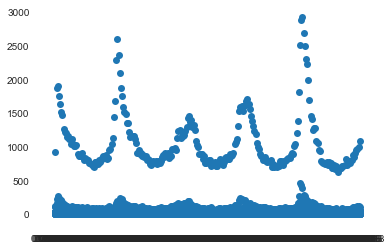

In [20]:
plt.plot_date(df['Week Ending Date'], df['Influenza and pneumonia (J10-J18)'])